# Formating Data Process

In [22]:
# Imports
import numpy as np
import pandas as pd
from datetime import time
from datetime import datetime
from datetime import timedelta
import re



#### Loop to generate the formated files into a csv files ready for the analysis


In [12]:
# region Init Variables

app_memory=[]
battery_power=[]
light_sensor=[]
active_notification_count=[]
pressure_sensor=[]
battery_temperature=[]
screen_brightness=[]
wifi_link_speed=[]
battery_level=[]
wifi_signal_strength=[]
total_tx_gb=[]
wifi_frequency=[]
app_rx_gb=[]
app_tx_gb=[]
total_rx_gb=[]
proximity_sensor=[]
steps_sensor=[]
volume_level_call=[]
volume_level_music=[]
volume_level_accessibility=[]
mobile_rx_gb=[]
mobile_tx_gb=[]
volume_level_system=[]
bluetooth_connection=[]
last_update_trigger=[]
device_locked=[]
interactive=[]
doze_mode=[]
last_used_app=[]
detected_activity=[]
headphones=[]
music_active=[]
wifi_connection=[]
network_type=[]
audio_mode=[]
phone_state=[]
bluetooth_state=[]
battery_state=[]
is_charging=[]
charger_type=[]
battery_health=[]
ble_transmitter=[]
do_not_disturb_sensor=[]
screen_off_timeout=[]
speakerphone=[]
mobile_data=[]
wifi_state=[]
power_save=[]

lastRef_app_memory = ''
lastRef_battery_power = ''
lastRef_last_update_trigger = ''
lastRef_light_sensor = ''
lastRef_active_notification_count = ''
lastRef_pressure_sensor = ''
lastRef_battery_temperature = ''
lastRef_screen_brightness = ''
lastRef_device_locked = ''
lastRef_wifi_link_speed = ''
lastRef_interactive = ''
lastRef_doze_mode = ''
lastRef_battery_level = ''
lastRef_wifi_signal_strength = ''
lastRef_total_tx_gb = ''
lastRef_wifi_frequency = ''
lastRef_app_rx_gb = ''
lastRef_app_tx_gb = ''
lastRef_last_used_app = ''
lastRef_total_rx_gb = ''
lastRef_detected_activity = ''
lastRef_proximity_sensor = ''
lastRef_steps_sensor = ''
lastRef_headphones = ''
lastRef_volume_level_call = ''
lastRef_volume_level_music = ''
lastRef_volume_level_accessibility = ''
lastRef_music_active = ''
lastRef_wifi_connection = ''
lastRef_network_type = ''
lastRef_mobile_rx_gb = ''
lastRef_mobile_tx_gb = ''
lastRef_audio_mode = ''
lastRef_phone_state = ''
lastRef_volume_level_system = ''
lastRef_bluetooth_connection = ''
lastRef_bluetooth_state = ''
lastRef_battery_state = ''
lastRef_is_charging = ''
lastRef_charger_type = ''
lastRef_battery_health = ''
lastRef_ble_transmitter = ''
lastRef_do_not_disturb_sensor = ''
lastRef_screen_off_timeout = ''
lastRef_speakerphone = ''
lastRef_mobile_data = ''
lastRef_wifi_state = ''
lastRef_power_save = ''
# endregion

# Load dataset
name = 'joaq'
filename = 'datasets/V1/Format/'+ name +'.txt'
file = open(filename, 'r')
lines = file.readlines()

# New Formated File (Dataset generated file)
file2 = open('datasets/V2/NewDS/'+ name + '.csv', 'w')

# Initial TimeRef (beguinin of dataset time stamp)
time_ref = datetime.strptime("2023-01-27 00:00:00.000", "%Y-%m-%d %H:%M:%S.%f")

#Window of time for each datapoint
winlen = 15
window = timedelta(minutes=winlen)

# Mobile Phone names
phoneName = 'SMG960F','SMA336B','CPH2197','CHP2371', 'PIXEL3A','SMA528B'

#Phone Index
y = 0


# Line String init
wline = ''

# Features List
head = 'time','app_memory','battery_power','last_update_trigger','light_sensor','active_notification_count','pressure_sensor','battery_temperature','screen_brightness','device_locked','wifi_link_speed','interactive','doze_mode','battery_level','wifi_signal_strength','total_tx_gb','wifi_frequency','app_rx_gb','app_tx_gb','last_used_app','total_rx_gb','detected_activity','proximity_sensor','steps_sensor','headphones','volume_level_call','volume_level_music','volume_level_accessibility','music_active','wifi_connection','network_type','mobile_rx_gb','mobile_tx_gb','audio_mode','phone_state','volume_level_system','bluetooth_connection','bluetooth_state','battery_state','is_charging','charger_type','battery_health','ble_transmitter','do_not_disturb_sensor','screen_off_timeout','speakerphone','mobile_data','wifi_state','power_save','device_id'

# Feature Index
i = 0

# Pass features name to first line in new DS
for x in head:
    wline = wline + head[i] + ','
    i = i + 1
wline = wline[:len(wline) - 1]

#Write Header
file2.writelines(wline)


# Reset All reference Values
reset_refValues()

for i in range(332):
    # Range Specs
    #DATASET V1 = 944 is from 17/01 00:00:00 until 26/01 20:00:00.
    #DATASET V2 = 332 is from 27/01 00:00:00 until 30/01 11:00:00
    #DATASET V2_2 = 656 is from 20/01 00:00:00.000 until 30/01 11:00:00
    
    # Empty String
    wline = ''
    
    # Data Window Definition
    time_ref2 = time_ref + window
    time_ref3 = time_ref
    time_ref = time_ref2
    
# region Restart Arrays
    app_memory=[]
    battery_power=[]
    light_sensor=[]
    active_notification_count=[]
    pressure_sensor=[]
    battery_temperature=[]
    screen_brightness=[]
    wifi_link_speed=[]
    battery_level=[]
    wifi_signal_strength=[]
    total_tx_gb=[]
    wifi_frequency=[]
    app_rx_gb=[]
    app_tx_gb=[]
    total_rx_gb=[]
    proximity_sensor=[]
    steps_sensor=[]
    volume_level_call=[]
    volume_level_music=[]
    volume_level_accessibility=[]
    mobile_rx_gb=[]
    mobile_tx_gb=[]
    volume_level_system=[]
    bluetooth_connection=[]
    last_update_trigger=[]
    device_locked=[]
    interactive=[]
    doze_mode=[]
    last_used_app=[]
    detected_activity=[]
    headphones=[]
    music_active=[]
    wifi_connection=[]
    network_type=[]
    audio_mode=[]
    phone_state=[]
    bluetooth_state=[]
    battery_state=[]
    is_charging=[]
    charger_type=[]
    battery_health=[]
    ble_transmitter=[]
    do_not_disturb_sensor=[]
    screen_off_timeout=[]
    speakerphone=[]
    mobile_data=[]
    wifi_state=[]
    power_save=[]
# endregion

    for line in lines:
        
        # Separate Values
        Ent = line.split(',')[0]
        val = line.split(',')[1]
        tim = line.split(',')[2]
        tim2 = datetime.strptime(tim[:(len(tim)-1)],"%Y-%m-%d %H:%M:%S.%f")
        
        # date = tim.split(' ')[0]
        # time = tim.split(' ')[1]
        if(tim2 < time_ref2 and tim2 > time_ref3):
            #Save date in referent Arrays
            switch_caseAi(Ent,val)
    
    # Generate the Single Values
    checkValues()
    
    # Prepare the Data Line (Datapoint)
    wline = '\n' + str(time_ref2) + ',' +  str(app_memory) + ',' + str(battery_power) + ',' + str(last_update_trigger) + ',' + str(light_sensor) + ',' + str(active_notification_count) + ',' + str(pressure_sensor) + ',' + str(battery_temperature) + ',' + str(screen_brightness) + ',' + str(device_locked) + ',' + str(wifi_link_speed) + ',' + str(interactive) + ',' + str(doze_mode) + ',' + str(battery_level) + ',' + str(wifi_signal_strength) + ',' + str(total_tx_gb) + ',' + str(wifi_frequency) + ',' + str(app_rx_gb) + ',' + str(app_tx_gb) + ',' + str(last_used_app) + ',' + str(total_rx_gb) + ',' + str(detected_activity) + ',' + str(proximity_sensor) + ',' + str(steps_sensor) + ',' + str(headphones) + ',' + str(volume_level_call) + ',' + str(volume_level_music) + ',' + str(volume_level_accessibility) + ',' + str(music_active) + ',' + str(wifi_connection) + ',' + str(network_type) + ',' + str(mobile_rx_gb) + ',' + str(mobile_tx_gb) + ',' + str(audio_mode) + ',' + str(phone_state) + ',' + str(volume_level_system) + ',' + str(bluetooth_connection) + ',' + str(bluetooth_state) + ',' + str(battery_state) + ',' + str(is_charging) + ',' + str(charger_type) + ',' + str(battery_health) + ',' + str(ble_transmitter) + ',' + str(do_not_disturb_sensor) + ',' + str(screen_off_timeout) + ',' + str(speakerphone) + ',' + str(mobile_data) + ',' + str(wifi_state) + ',' + str(power_save) + ',' + str(phoneName[y])
    
    #Write Data into File
    file2.writelines(wline)
        
file2.close()


##### Function to Format Values

In [3]:
#Function to Reset Values
def reset_refValues():

    lastRef_app_memory = ''
    lastRef_battery_power = ''
    lastRef_last_update_trigger = ''
    lastRef_light_sensor = ''
    lastRef_active_notification_count = ''
    lastRef_pressure_sensor = ''
    lastRef_battery_temperature = ''
    lastRef_screen_brightness = ''
    lastRef_device_locked = ''
    lastRef_wifi_link_speed = ''
    lastRef_interactive = ''
    lastRef_doze_mode = ''
    lastRef_battery_level = ''
    lastRef_wifi_signal_strength = ''
    lastRef_total_tx_gb = ''
    lastRef_wifi_frequency = ''
    lastRef_app_rx_gb = ''
    lastRef_app_tx_gb = ''
    lastRef_last_used_app = ''
    lastRef_total_rx_gb = ''
    lastRef_detected_activity = ''
    lastRef_proximity_sensor = ''
    lastRef_steps_sensor = ''
    lastRef_headphones = ''
    lastRef_volume_level_call = ''
    lastRef_volume_level_music = ''
    lastRef_volume_level_accessibility = ''
    lastRef_music_active = ''
    lastRef_wifi_connection = ''
    lastRef_network_type = ''
    lastRef_mobile_rx_gb = ''
    lastRef_mobile_tx_gb = ''
    lastRef_audio_mode = ''
    lastRef_phone_state = ''
    lastRef_volume_level_system = ''
    lastRef_bluetooth_connection = ''
    lastRef_bluetooth_state = ''
    lastRef_battery_state = ''
    lastRef_is_charging = ''
    lastRef_charger_type = ''
    lastRef_battery_health = ''
    lastRef_ble_transmitter = ''
    lastRef_do_not_disturb_sensor = ''
    lastRef_screen_off_timeout = ''
    lastRef_speakerphone = ''
    lastRef_mobile_data = ''
    lastRef_wifi_state = ''
    lastRef_power_save = ''

In [6]:
#Function to Homogenize Values
def checkValues():
    
    # region Global Variables
    global app_memory
    global lastRef_app_memory
    global battery_power
    global lastRef_battery_power
    global light_sensor
    global lastRef_light_sensor
    global active_notification_count
    global lastRef_active_notification_count
    global pressure_sensor
    global lastRef_pressure_sensor
    global battery_temperature
    global lastRef_battery_temperature
    global screen_brightness
    global lastRef_screen_brightness
    global wifi_link_speed
    global lastRef_wifi_link_speed
    global battery_level
    global lastRef_battery_level
    global wifi_signal_strength
    global lastRef_wifi_signal_strength
    global total_tx_gb
    global lastRef_total_tx_gb
    global wifi_frequency
    global lastRef_wifi_frequency
    global app_rx_gb
    global lastRef_app_rx_gb
    global app_tx_gb
    global lastRef_app_tx_gb
    global total_rx_gb
    global lastRef_total_rx_gb
    global proximity_sensor
    global lastRef_proximity_sensor
    global steps_sensor
    global lastRef_steps_sensor
    global volume_level_call
    global lastRef_volume_level_call
    global volume_level_music
    global lastRef_volume_level_music
    global volume_level_accessibility
    global lastRef_volume_level_accessibility
    global mobile_rx_gb
    global lastRef_mobile_rx_gb
    global mobile_tx_gb
    global lastRef_mobile_tx_gb
    global volume_level_system
    global lastRef_volume_level_system
    global bluetooth_connection
    global lastRef_bluetooth_connection
    global last_update_trigger
    global lastRef_last_update_trigger
    global device_locked
    global lastRef_device_locked
    global interactive
    global lastRef_interactive
    global doze_mode
    global lastRef_doze_mode
    global last_used_app
    global lastRef_last_used_app
    global detected_activity
    global lastRef_detected_activity
    global headphones
    global lastRef_headphones
    global music_active
    global lastRef_music_active
    global wifi_connection
    global lastRef_wifi_connection
    global network_type
    global lastRef_network_type
    global audio_mode
    global lastRef_audio_mode
    global phone_state
    global lastRef_phone_state
    global bluetooth_state
    global lastRef_bluetooth_state
    global battery_state
    global lastRef_battery_state
    global is_charging
    global lastRef_is_charging
    global charger_type
    global lastRef_charger_type
    global battery_health
    global lastRef_battery_health
    global ble_transmitter
    global lastRef_ble_transmitter
    global do_not_disturb_sensor
    global lastRef_do_not_disturb_sensor
    global screen_off_timeout
    global lastRef_screen_off_timeout
    global speakerphone
    global lastRef_speakerphone
    global mobile_data
    global lastRef_mobile_data
    global wifi_state
    global lastRef_wifi_state
    global power_save
    global lastRef_power_save
    # endregion

    # region Quantitative Values
    if len(app_memory) > 1:
        res = list(map(lambda x: float(x.replace(',','')),app_memory))
        lastRef_app_memory = np.average(res)
        app_memory = np.average(res)
    elif len(app_memory) == 1:
        lastRef_app_memory = app_memory
    if not app_memory:
        if not lastRef_app_memory :
            app_memory = 0
            lastRef_app_memory = 0
        else:
            app_memory = lastRef_app_memory

    if len(battery_power) > 1:
        res = list(map(lambda x: float(x.replace(',','')),battery_power))
        lastRef_battery_power = np.average(res)
        battery_power = np.average(res)
    elif len(battery_power) == 1:
        lastRef_battery_power = battery_power
    if not battery_power:
        if not lastRef_battery_power :
            battery_power = 0
            lastRef_battery_power = 0
        else:
            battery_power = lastRef_battery_power

    if len(light_sensor) > 1:
        res = list(map(lambda x: float(x.replace(',','')),light_sensor))
        lastRef_light_sensor = np.average(res)
        light_sensor = np.average(res)
    elif len(light_sensor) == 1:
        lastRef_light_sensor = light_sensor
    if not light_sensor:
        if not lastRef_light_sensor :
            light_sensor = 0
            lastRef_light_sensor = 0
        else:
            light_sensor = lastRef_light_sensor

    if len(active_notification_count) > 1:
        res = list(map(lambda x: float(x.replace(',','')),active_notification_count))
        lastRef_active_notification_count = np.average(res)
        active_notification_count = np.average(res)
    elif len(active_notification_count) == 1:
        lastRef_active_notification_count = active_notification_count
    if not active_notification_count:
        if not lastRef_active_notification_count :
            active_notification_count = 0
            lastRef_active_notification_count = 0
        else:
            active_notification_count = lastRef_active_notification_count

    if len(pressure_sensor) > 1:
        res = list(map(lambda x: float(x.replace(',','')),pressure_sensor))
        lastRef_pressure_sensor = np.average(res)
        pressure_sensor = np.average(res)
    elif len(pressure_sensor) == 1:
        lastRef_pressure_sensor = pressure_sensor
    if not pressure_sensor:
        if not lastRef_pressure_sensor :
            pressure_sensor = 0
            lastRef_pressure_sensor = 0
        else:
            pressure_sensor = lastRef_pressure_sensor

    if len(battery_temperature) > 1:
        res = list(map(lambda x: float(x.replace(',','')),battery_temperature))
        lastRef_battery_temperature = np.average(res)
        battery_temperature = np.average(res)
    elif len(battery_temperature) == 1:
        lastRef_battery_temperature = battery_temperature
    if not battery_temperature:
        if not lastRef_battery_temperature :
            battery_temperature = 0
            lastRef_battery_temperature = 0
        else:
            battery_temperature = lastRef_battery_temperature

    if len(screen_brightness) > 1:
        res = list(map(lambda x: float(x.replace(',','')),screen_brightness))
        lastRef_screen_brightness = np.average(res)
        screen_brightness = np.average(res)
    elif len(screen_brightness) == 1:
        lastRef_screen_brightness = screen_brightness
    if not screen_brightness:
        if not lastRef_screen_brightness :
            screen_brightness = 0
            lastRef_screen_brightness = 0
        else:
            screen_brightness = lastRef_screen_brightness

    if len(wifi_link_speed) > 1:
        res = list(map(lambda x: float(x.replace(',','')),wifi_link_speed))
        lastRef_wifi_link_speed = np.average(res)
        wifi_link_speed = np.average(res)
    elif len(wifi_link_speed) == 1:
        lastRef_wifi_link_speed = wifi_link_speed
    if not wifi_link_speed:
        if not lastRef_wifi_link_speed :
            wifi_link_speed = 0
            lastRef_wifi_link_speed = 0
        else:
            wifi_link_speed = lastRef_wifi_link_speed

    if len(battery_level) > 1:
        res = list(map(lambda x: float(x.replace(',','')),battery_level))
        lastRef_battery_level = np.average(res)
        battery_level = np.average(res)
    elif len(battery_level) == 1:
        lastRef_battery_level = battery_level
    if not battery_level:
        if not lastRef_battery_level :
            battery_level = 0
            lastRef_battery_level = 0
        else:
            battery_level = lastRef_battery_level

    if len(wifi_signal_strength) > 1:
        res = list(map(lambda x: float(x.replace(',','')),wifi_signal_strength))
        lastRef_wifi_signal_strength = np.average(res)
        wifi_signal_strength = np.average(res)
    elif len(wifi_signal_strength) == 1:
        lastRef_wifi_signal_strength = wifi_signal_strength
    if not wifi_signal_strength:
        if not lastRef_wifi_signal_strength :
            wifi_signal_strength = 0
            lastRef_wifi_signal_strength = 0
        else:
            wifi_signal_strength = lastRef_wifi_signal_strength

    if len(total_tx_gb) > 1:
        res = list(map(lambda x: float(x.replace(',','')),total_tx_gb))
        lastRef_total_tx_gb = np.average(res)
        total_tx_gb = np.average(res)
    elif len(total_tx_gb) == 1:
        lastRef_total_tx_gb = total_tx_gb
    if not total_tx_gb:
        if not lastRef_total_tx_gb :
            total_tx_gb = 0
            lastRef_total_tx_gb = 0
        else:
            total_tx_gb = lastRef_total_tx_gb

    if len(wifi_frequency) > 1:
        res = list(map(lambda x: float(x.replace(',','')),wifi_frequency))
        lastRef_wifi_frequency = np.average(res)
        wifi_frequency = np.average(res)
    elif len(wifi_frequency) == 1:
        lastRef_wifi_frequency = wifi_frequency
    if not wifi_frequency:
        if not lastRef_wifi_frequency :
            wifi_frequency = 0
            lastRef_wifi_frequency = 0
        else:
            wifi_frequency = lastRef_wifi_frequency

    if len(app_rx_gb) > 1:
        res = list(map(lambda x: float(x.replace(',','')),app_rx_gb))
        lastRef_app_rx_gb = np.average(res)
        app_rx_gb = np.average(res)
    elif len(app_rx_gb) == 1:
        lastRef_app_rx_gb = app_rx_gb
    if not app_rx_gb:
        if not lastRef_app_rx_gb :
            app_rx_gb = 0
            lastRef_app_rx_gb = 0
        else:
            app_rx_gb = lastRef_app_rx_gb

    if len(app_tx_gb) > 1:
        res = list(map(lambda x: float(x.replace(',','')),app_tx_gb))
        lastRef_app_tx_gb = np.average(res)
        app_tx_gb = np.average(res)
    elif len(app_tx_gb) == 1:
        lastRef_app_tx_gb = app_tx_gb
    if not app_tx_gb:
        if not lastRef_app_tx_gb :
            app_tx_gb = 0
            lastRef_app_tx_gb = 0
        else:
            app_tx_gb = lastRef_app_tx_gb

    if len(total_rx_gb) > 1:
        res = list(map(lambda x: float(x.replace(',','')),total_rx_gb))
        lastRef_total_rx_gb = np.average(res)
        total_rx_gb = np.average(res)
    elif len(total_rx_gb) == 1:
        lastRef_total_rx_gb = total_rx_gb
    if not total_rx_gb:
        if not lastRef_total_rx_gb :
            total_rx_gb = 0
            lastRef_total_rx_gb = 0
        else:
            total_rx_gb = lastRef_total_rx_gb

    if len(proximity_sensor) > 1:
        res = list(map(lambda x: float(x.replace(',','')),proximity_sensor))
        lastRef_proximity_sensor = np.average(res)
        proximity_sensor = np.average(res)
    elif len(proximity_sensor) == 1:
        lastRef_proximity_sensor = proximity_sensor
    if not proximity_sensor:
        if not lastRef_proximity_sensor :
            proximity_sensor = 0
            lastRef_proximity_sensor = 0
        else:
            proximity_sensor = lastRef_proximity_sensor

    if len(steps_sensor) > 1:
        res = list(map(lambda x: float(x.replace(',','')),steps_sensor))
        lastRef_steps_sensor = np.average(res)
        steps_sensor = np.average(res)
    elif len(steps_sensor) == 1:
        lastRef_steps_sensor = steps_sensor
    if not steps_sensor:
        if not lastRef_steps_sensor :
            steps_sensor = 0
            lastRef_steps_sensor = 0
        else:
            steps_sensor = lastRef_steps_sensor

    if len(volume_level_call) > 1:
        res = list(map(lambda x: float(x.replace(',','')),volume_level_call))
        lastRef_volume_level_call = np.average(res)
        volume_level_call = np.average(res)
    elif len(volume_level_call) == 1:
        lastRef_volume_level_call = volume_level_call
    if not volume_level_call:
        if not lastRef_volume_level_call :
            volume_level_call = 0
            lastRef_volume_level_call = 0
        else:
            volume_level_call = lastRef_volume_level_call

    if len(volume_level_music) > 1:
        res = list(map(lambda x: float(x.replace(',','')),volume_level_music))
        lastRef_volume_level_music = np.average(res)
        volume_level_music = np.average(res)
    elif len(volume_level_music) == 1:
        lastRef_volume_level_music = volume_level_music
    if not volume_level_music:
        if not lastRef_volume_level_music :
            volume_level_music = 0
            lastRef_volume_level_music = 0
        else:
            volume_level_music = lastRef_volume_level_music

    if len(volume_level_accessibility) > 1:
        res = list(map(lambda x: float(x.replace(',','')),volume_level_accessibility))
        lastRef_volume_level_accessibility = np.average(res)
        volume_level_accessibility = np.average(res)
    elif len(volume_level_accessibility) == 1:
        lastRef_volume_level_accessibility = volume_level_accessibility
    if not volume_level_accessibility:
        if not lastRef_volume_level_accessibility :
            volume_level_accessibility = 0
            lastRef_volume_level_accessibility = 0
        else:
            volume_level_accessibility = lastRef_volume_level_accessibility

    if len(mobile_rx_gb) > 1:
        res = list(map(lambda x: float(x.replace(',','')),mobile_rx_gb))
        lastRef_mobile_rx_gb = np.average(res)
        mobile_rx_gb = np.average(res)
    elif len(mobile_rx_gb) == 1:
        lastRef_mobile_rx_gb = mobile_rx_gb
    if not mobile_rx_gb:
        if not lastRef_mobile_rx_gb :
            mobile_rx_gb = 0
            lastRef_mobile_rx_gb = 0
        else:
            mobile_rx_gb = lastRef_mobile_rx_gb

    if len(mobile_tx_gb) > 1:
        res = list(map(lambda x: float(x.replace(',','')),mobile_tx_gb))
        lastRef_mobile_tx_gb = np.average(res)
        mobile_tx_gb = np.average(res)
    elif len(mobile_tx_gb) == 1:
        lastRef_mobile_tx_gb = mobile_tx_gb
    if not mobile_tx_gb:
        if not lastRef_mobile_tx_gb :
            mobile_tx_gb = 0
            lastRef_mobile_tx_gb = 0
        else:
            mobile_tx_gb = lastRef_mobile_tx_gb

    if len(volume_level_system) > 1:
        res = list(map(lambda x: float(x.replace(',','')),volume_level_system))
        lastRef_volume_level_system = np.average(res)
        volume_level_system = np.average(res)
    elif len(volume_level_system) == 1:
        lastRef_volume_level_system = volume_level_system
    if not volume_level_system:
        if not lastRef_volume_level_system :
            volume_level_system = 0
            lastRef_volume_level_system = 0
        else:
            volume_level_system = lastRef_volume_level_system

    if len(bluetooth_connection) > 1:
        res = list(map(lambda x: float(x.replace(',','')),bluetooth_connection))
        lastRef_bluetooth_connection = np.average(res)
        bluetooth_connection = np.average(res)
    elif len(bluetooth_connection) == 1:
        lastRef_bluetooth_connection = bluetooth_connection
    if not bluetooth_connection:
        if not lastRef_bluetooth_connection :
            bluetooth_connection = 0
            lastRef_bluetooth_connection = 0
        else:
            bluetooth_connection = lastRef_bluetooth_connection
    # endregion
    
    if len(last_update_trigger) > 1:
        lastRef_last_update_trigger = last_update_trigger[0]
    if not lastRef_last_update_trigger:
        last_update_trigger = 'SensorWorker'
    else:
        last_update_trigger = lastRef_last_update_trigger

    if len(device_locked) > 1:
        lastRef_device_locked = device_locked[0]
    if not lastRef_device_locked:
        device_locked = 'off'
    else:
        device_locked = lastRef_device_locked

    if len(interactive) > 1:
        lastRef_interactive = interactive[0]
    if not lastRef_interactive:
        interactive = 'off'
    else:
        interactive = lastRef_interactive

    if len(doze_mode) > 1:
        lastRef_doze_mode = doze_mode[0]
    if not lastRef_doze_mode:
        doze_mode = 'off'
    else:
        doze_mode = lastRef_doze_mode

    if len(last_used_app) > 1:
        lastRef_last_used_app = last_used_app[0]
    if not lastRef_last_used_app:
        last_used_app = 'unknown'
    else:
        last_used_app = lastRef_last_used_app

    if len(detected_activity) > 1:
        lastRef_detected_activity = detected_activity[0]
    if not lastRef_detected_activity:
        detected_activity = 'unknown'
    else:
        detected_activity = lastRef_detected_activity

    if len(headphones) > 1:
        lastRef_headphones = headphones[0]
    if not lastRef_headphones:
        headphones = 'off'
    else:
        headphones = lastRef_headphones

    if len(music_active) > 1:
        lastRef_music_active = music_active[0]
    if not lastRef_music_active:
        music_active = 'off'
    else:
        music_active = lastRef_music_active

    if len(wifi_connection) > 1:
        lastRef_wifi_connection = wifi_connection[0]
    if not lastRef_wifi_connection:
        wifi_connection = '<not connected>'
    else:
        wifi_connection = lastRef_wifi_connection

    if len(network_type) > 1:
        lastRef_network_type = network_type[0]
    if not lastRef_network_type:
        network_type = 'cellular'
    else:
        network_type = lastRef_network_type

    if len(audio_mode) > 1:
        lastRef_audio_mode = audio_mode[0]
    if not lastRef_audio_mode:
        audio_mode = 'normal'
    else:
        audio_mode = lastRef_audio_mode

    if len(phone_state) > 1:
        lastRef_phone_state = phone_state[0]
    if not lastRef_phone_state:
        phone_state = 'idle'
    else:
        phone_state = lastRef_phone_state

    if len(bluetooth_state) > 1:
        lastRef_bluetooth_state = bluetooth_state[0]
    if not lastRef_bluetooth_state:
        bluetooth_state = 'off'
    else:
        bluetooth_state = lastRef_bluetooth_state

    if len(battery_state) > 1:
        lastRef_battery_state = battery_state[0]
    if not lastRef_battery_state:
        battery_state = 'discharging'
    else:
        battery_state = lastRef_battery_state

    if len(is_charging) > 1:
        lastRef_is_charging = is_charging[0]
    if not lastRef_is_charging:
        is_charging = 'off'
    else:
        is_charging = lastRef_is_charging

    if len(charger_type) > 1:
        lastRef_charger_type = charger_type[0]
    if not lastRef_charger_type:
        charger_type = 'none'
    else:
        charger_type = lastRef_charger_type

    if len(battery_health) > 1:
        lastRef_battery_health = battery_health[0]
    if not lastRef_battery_health:
        battery_health = 'good'
    else:
        battery_health = lastRef_battery_health

    if len(ble_transmitter) > 1:
        lastRef_ble_transmitter = ble_transmitter[0]
    if not lastRef_ble_transmitter:
        ble_transmitter = 'transmitting'
    else:
        ble_transmitter = lastRef_ble_transmitter

    if len(do_not_disturb_sensor) > 1:
        lastRef_do_not_disturb_sensor = do_not_disturb_sensor[0]
    if not lastRef_do_not_disturb_sensor:
        do_not_disturb_sensor = 'unknown'
    else:
        do_not_disturb_sensor = lastRef_do_not_disturb_sensor

    if len(screen_off_timeout) > 1:
        lastRef_screen_off_timeout = screen_off_timeout[0]
    if not lastRef_screen_off_timeout:
        screen_off_timeout = 'unknown'
    else:
        screen_off_timeout = lastRef_screen_off_timeout

    if len(speakerphone) > 1:
        lastRef_speakerphone = speakerphone[0]
    if not lastRef_speakerphone:
        speakerphone = 'off'
    else:
        speakerphone = lastRef_speakerphone

    if len(mobile_data) > 1:
        lastRef_mobile_data = mobile_data[0]
    if not lastRef_mobile_data:
        mobile_data = 'off'
    else:
        mobile_data = lastRef_mobile_data

    if len(wifi_state) > 1:
        lastRef_wifi_state = wifi_state[0]
    if not lastRef_wifi_state:
        wifi_state = 'off'
    else:
        wifi_state = lastRef_wifi_state

    if len(power_save) > 1:
        lastRef_power_save = power_save[0]
    if not lastRef_power_save:
        power_save = 'off'
    else:
        power_save = lastRef_power_save

In [7]:
#Reset Lists
def reset_lists():
    
    app_memory=[]
    battery_power=[]
    light_sensor=[]
    active_notification_count=[]
    pressure_sensor=[]
    battery_temperature=[]
    screen_brightness=[]
    wifi_link_speed=[]
    battery_level=[]
    wifi_signal_strength=[]
    total_tx_gb=[]
    wifi_frequency=[]
    app_rx_gb=[]
    app_tx_gb=[]
    total_rx_gb=[]
    proximity_sensor=[]
    steps_sensor=[]
    volume_level_call=[]
    volume_level_music=[]
    volume_level_accessibility=[]
    mobile_rx_gb=[]
    mobile_tx_gb=[]
    volume_level_system=[]
    bluetooth_connection=[]
    last_update_trigger=[]
    device_locked=[]
    interactive=[]
    doze_mode=[]
    last_used_app=[]
    detected_activity=[]
    headphones=[]
    music_active=[]
    wifi_connection=[]
    network_type=[]
    audio_mode=[]
    phone_state=[]
    bluetooth_state=[]
    battery_state=[]
    is_charging=[]
    charger_type=[]
    battery_health=[]
    ble_transmitter=[]
    do_not_disturb_sensor=[]
    screen_off_timeout=[]
    speakerphone=[]
    mobile_data=[]
    wifi_state=[]
    power_save=[]

In [8]:
#Register Data into the arrays
def switch_caseAi(entity_id, value):
    
    # region Define Global Variables
    global app_memory
    global lastRef_app_memory
    global battery_power
    global lastRef_battery_power
    global light_sensor
    global lastRef_light_sensor
    global active_notification_count
    global lastRef_active_notification_count
    global pressure_sensor
    global lastRef_pressure_sensor
    global battery_temperature
    global lastRef_battery_temperature
    global screen_brightness
    global lastRef_screen_brightness
    global wifi_link_speed
    global lastRef_wifi_link_speed
    global battery_level
    global lastRef_battery_level
    global wifi_signal_strength
    global lastRef_wifi_signal_strength
    global total_tx_gb
    global lastRef_total_tx_gb
    global wifi_frequency
    global lastRef_wifi_frequency
    global app_rx_gb
    global lastRef_app_rx_gb
    global app_tx_gb
    global lastRef_app_tx_gb
    global total_rx_gb
    global lastRef_total_rx_gb
    global proximity_sensor
    global lastRef_proximity_sensor
    global steps_sensor
    global lastRef_steps_sensor
    global volume_level_call
    global lastRef_volume_level_call
    global volume_level_music
    global lastRef_volume_level_music
    global volume_level_accessibility
    global lastRef_volume_level_accessibility
    global mobile_rx_gb
    global lastRef_mobile_rx_gb
    global mobile_tx_gb
    global lastRef_mobile_tx_gb
    global volume_level_system
    global lastRef_volume_level_system
    global bluetooth_connection
    global lastRef_bluetooth_connection
    global last_update_trigger
    global lastRef_last_update_trigger
    global device_locked
    global lastRef_device_locked
    global interactive
    global lastRef_interactive
    global doze_mode
    global lastRef_doze_mode
    global last_used_app
    global lastRef_last_used_app
    global detected_activity
    global lastRef_detected_activity
    global headphones
    global lastRef_headphones
    global music_active
    global lastRef_music_active
    global wifi_connection
    global lastRef_wifi_connection
    global network_type
    global lastRef_network_type
    global audio_mode
    global lastRef_audio_mode
    global phone_state
    global lastRef_phone_state
    global bluetooth_state
    global lastRef_bluetooth_state
    global battery_state
    global lastRef_battery_state
    global is_charging
    global lastRef_is_charging
    global charger_type
    global lastRef_charger_type
    global battery_health
    global lastRef_battery_health
    global ble_transmitter
    global lastRef_ble_transmitter
    global do_not_disturb_sensor
    global lastRef_do_not_disturb_sensor
    global screen_off_timeout
    global lastRef_screen_off_timeout
    global speakerphone
    global lastRef_speakerphone
    global mobile_data
    global lastRef_mobile_data
    global wifi_state
    global lastRef_wifi_state
    global power_save
    global lastRef_power_save
    # endregion
    
    if entity_id  == 'app_memory':
        app_memory.append(value)
    
    elif entity_id  == 'battery_power': 
        battery_power.append(value)
        
    elif entity_id  == 'last_update_trigger': 
        last_update_trigger.append(value)
        
    elif entity_id  == 'light_sensor': 
        light_sensor.append(value)
    
    elif entity_id  == 'active_notification_count': 
        active_notification_count.append(value)
    
    elif entity_id  == 'pressure_sensor': 
        pressure_sensor.append(value)
    
    elif entity_id  == 'battery_temperature': 
        battery_temperature.append(value)
    
    elif entity_id  == 'screen_brightness': 
        screen_brightness.append(value)
    
    elif entity_id  == 'device_locked': 
        device_locked.append(value)
    
    elif entity_id  == 'wifi_link_speed': 
        wifi_link_speed.append(value)
    
    elif entity_id  == 'interactive': 
        interactive.append(value)
    
    elif entity_id  == 'battery_level': 
        battery_level.append(value)
    
    elif entity_id  == 'wifi_signal_strength': 
        wifi_signal_strength.append(value)
    
    elif entity_id  == 'total_tx_gb': 
            total_tx_gb.append(value),
    
    elif entity_id  == 'wifi_frequency': 
        wifi_frequency.append(value)
    
    elif entity_id  == 'app_rx_gb': 
        app_rx_gb.append(value)
    
    elif entity_id  == 'app_tx_gb': 
        app_tx_gb.append(value)
    
    elif entity_id  == 'last_used_app':
        last_used_app.append(value)
    
    elif entity_id  == 'total_rx_gb': 
        total_rx_gb.append(value)
    
    elif entity_id  == 'detected_activity': 
        detected_activity.append(value)
    
    elif entity_id  == 'proximity_sensor': 
        proximity_sensor.append(value)
    
    elif entity_id  == 'steps_sensor': 
        steps_sensor.append(value)
    
    elif entity_id  == 'headphones': 
        headphones.append(value)
        
    elif entity_id  == 'volume_level_call': 
        volume_level_call.append(value) 
        
    elif entity_id  == 'volume_level_music': 
        volume_level_music.append(value)
        
    elif entity_id  == 'volume_level_accessibility': 
        volume_level_accessibility.append(value)
        
    elif entity_id  == 'music_active': 
        music_active.append(value)
        
    elif entity_id  == 'wifi_connection': 
        wifi_connection.append(value)
        
    elif entity_id  == 'network_type': 
        network_type.append(value)
        
    elif entity_id  == 'mobile_rx_gb': 
        mobile_rx_gb.append(value)
        
    elif entity_id  == 'mobile_tx_gb': 
        mobile_tx_gb.append(value)
        
    elif entity_id  == 'audio_mode': 
        audio_mode.append(value)
        
    elif entity_id  == 'phone_state': 
        phone_state.append(value)
        
    elif entity_id  == 'volume_level_system': 
        volume_level_system.append(value)
        
    elif entity_id  == 'bluetooth_connection': 
        bluetooth_connection.append(value)
        
    elif entity_id  == 'bluetooth_state': 
        bluetooth_state.append(value)
        
    elif entity_id  == 'battery_state': 
        battery_state.append(value)
        
    elif entity_id  == 'is_charging': 
        is_charging.append(value)
        
    elif entity_id  == 'charger_type': 
        charger_type.append(value)
        
    elif entity_id  == 'battery_health': 
        battery_health.append(value)
        
    elif entity_id  == 'ble_transmitter': 
        ble_transmitter.append(value)
        
    elif entity_id  == 'do_not_disturb_sensor': 
        do_not_disturb_sensor.append(value)
        
    elif entity_id  == 'screen_off_timeout': 
        screen_off_timeout.append(value)    
        
    elif entity_id  == 'speakerphone': 
        speakerphone.append(value)
        
    elif entity_id  == 'mobile_data': 
        mobile_data.append(value)
        
    elif entity_id  == 'wifi_state': 
        wifi_state.append(value)
        
    elif entity_id  == 'power_save': 
        power_save.append(value)

# Data Analysis

## Load Dataset

In [55]:
import numpy as np
import pandas as pd

#Dataset Choice
ds_name = 'dataset_V1'
# ds_name = 'dataset_V1_2'
# ds_name = 'dataset_V2'

# Load dataset
df = pd.read_csv('datasets/PreClasifiing Features/'+ ds_name + '.csv')
df

,time,app_memory,battery_power,last_update_trigger,light_sensor,active_notification_count,pressure_sensor,battery_temperature,screen_brightness,device_locked,...,charger_type,battery_health,ble_transmitter,do_not_disturb_sensor,screen_off_timeout,speakerphone,mobile_data,wifi_state,power_save,device_id
0,2023-01-17 00:15:00,0.00000,0.000000,SensorWorker,0.000000,0.00,0.0,0.00,0.0,off,...,none,good,transmitting,unknown,unknown,off,off,off,off,SMG960F
1,2023-01-17 00:30:00,0.00000,0.000000,SensorWorker,0.000000,0.00,0.0,22.20,0.0,off,...,none,good,transmitting,unknown,unknown,off,off,off,off,SMG960F
2,2023-01-17 00:45:00,0.00000,0.000000,SensorWorker,0.000000,0.00,0.0,21.80,0.0,off,...,none,good,transmitting,unknown,unknown,off,off,off,off,SMG960F
3,2023-01-17 01:00:00,0.00000,0.000000,SensorWorker,0.000000,0.00,0.0,21.90,0.0,off,...,none,good,transmitting,unknown,unknown,off,off,off,off,SMG960F
4,2023-01-17 01:15:00,0.00000,0.000000,SensorWorker,0.000000,0.00,0.0,21.60,0.0,off,...,none,good,transmitting,unknown,unknown,off,off,off,off,SMG960F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5659,2023-01-26 19:00:00,0.01175,-0.002500,android.intent.action.SCREEN_ON,21.333333,9.00,0.0,18.25,0.0,off,...,none,good,Transmitting,unknown,unknown,on,off,off,off,SMA528B
5660,2023-01-26 19:15:00,0.01450,0.000000,android.net.wifi.STATE_CHANGE,13.500000,10.00,0.0,17.60,0.0,off,...,none,good,Transmitting,unknown,unknown,on,off,off,off,SMA528B
5661,2023-01-26 19:30:00,0.01200,-0.003333,android.intent.action.PHONE_STATE,0.666667,11.75,0.0,17.15,0.0,off,...,none,good,Transmitting,unknown,unknown,on,off,off,off,SMA528B
5662,2023-01-26 19:45:00,0.01150,0.000000,android.net.wifi.STATE_CHANGE,0.666667,16.00,0.0,17.15,0.0,off,...,none,good,Transmitting,unknown,unknown,on,off,off,off,SMA528B


In [56]:
# Put time colum as index
df = df.set_index('time')
df


,app_memory,battery_power,last_update_trigger,light_sensor,active_notification_count,pressure_sensor,battery_temperature,screen_brightness,device_locked,wifi_link_speed,...,charger_type,battery_health,ble_transmitter,do_not_disturb_sensor,screen_off_timeout,speakerphone,mobile_data,wifi_state,power_save,device_id
time,,,,,,,,,,,,,,,,,,,,,
2023-01-17 00:15:00,0.00000,0.000000,SensorWorker,0.000000,0.00,0.0,0.00,0.0,off,0.0,...,none,good,transmitting,unknown,unknown,off,off,off,off,SMG960F
2023-01-17 00:30:00,0.00000,0.000000,SensorWorker,0.000000,0.00,0.0,22.20,0.0,off,0.0,...,none,good,transmitting,unknown,unknown,off,off,off,off,SMG960F
2023-01-17 00:45:00,0.00000,0.000000,SensorWorker,0.000000,0.00,0.0,21.80,0.0,off,0.0,...,none,good,transmitting,unknown,unknown,off,off,off,off,SMG960F
2023-01-17 01:00:00,0.00000,0.000000,SensorWorker,0.000000,0.00,0.0,21.90,0.0,off,0.0,...,none,good,transmitting,unknown,unknown,off,off,off,off,SMG960F
2023-01-17 01:15:00,0.00000,0.000000,SensorWorker,0.000000,0.00,0.0,21.60,0.0,off,0.0,...,none,good,transmitting,unknown,unknown,off,off,off,off,SMG960F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-26 19:00:00,0.01175,-0.002500,android.intent.action.SCREEN_ON,21.333333,9.00,0.0,18.25,0.0,off,341.0,...,none,good,Transmitting,unknown,unknown,on,off,off,off,SMA528B
2023-01-26 19:15:00,0.01450,0.000000,android.net.wifi.STATE_CHANGE,13.500000,10.00,0.0,17.60,0.0,off,341.0,...,none,good,Transmitting,unknown,unknown,on,off,off,off,SMA528B
2023-01-26 19:30:00,0.01200,-0.003333,android.intent.action.PHONE_STATE,0.666667,11.75,0.0,17.15,0.0,off,351.0,...,none,good,Transmitting,unknown,unknown,on,off,off,off,SMA528B


## Inspect Dataset

In [57]:
#print describe information about features
dataframe.describe()

,app_memory,battery_power,light_sensor,active_notification_count,pressure_sensor,battery_temperature,screen_brightness,wifi_link_speed,battery_level,wifi_signal_strength,...,app_tx_gb,total_rx_gb,proximity_sensor,steps_sensor,volume_level_call,volume_level_music,volume_level_accessibility,mobile_rx_gb,mobile_tx_gb,volume_level_system
count,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1.328000e+03,1328.000000,1328.000000,...,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000
mean,0.018171,-0.000612,170.954842,3.148816,250.147626,22.927341,59.564781,1.500525e+03,54.555958,-25.087790,...,0.015389,12.811883,2.290085,13587.196679,3.094521,5.668863,5.901406,0.655329,0.038214,1.251046
std,0.005779,0.002145,1062.777983,2.844696,433.550795,4.718853,53.463150,4.914351e+04,27.793459,25.700795,...,0.010662,18.691708,2.033503,10342.562098,2.612813,4.245907,3.777286,1.078497,0.048193,2.830539
min,0.007500,-0.010000,0.000000,0.000000,0.000000,10.600000,0.000000,-5.000000e-01,0.000000,-88.000000,...,0.000000,0.001500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.013250,0.000000,0.575000,1.000000,0.000000,19.190000,20.000000,0.000000e+00,34.000000,-52.000000,...,0.006275,1.820250,0.000000,6506.000000,0.000000,2.000000,3.000000,0.011000,0.002000,0.000000
50%,0.017286,0.000000,18.733333,2.000000,0.000000,22.200000,47.000000,2.600000e+01,51.000000,-22.500000,...,0.012300,2.608000,2.500000,12783.000000,5.000000,5.500000,5.666667,0.113333,0.015500,0.000000
75%,0.022000,0.000000,62.000000,4.000000,228.575000,26.100000,92.333333,3.547000e+02,80.000000,-1.000000,...,0.026725,13.591750,3.000000,13314.250000,5.000000,7.500000,8.000000,0.558000,0.063000,1.000000
max,0.038000,0.010000,26721.388889,16.000000,1029.020000,37.100000,255.000000,1.791014e+06,100.000000,0.000000,...,0.034900,46.334500,8.000000,46669.500000,8.000000,16.000000,15.000000,3.406000,0.173000,14.000000


In [58]:
# Information about the Dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5664 entries, 2023-01-17 00:15:00 to 2023-01-26 20:00:00
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   app_memory                  5664 non-null   float64
 1   battery_power               5664 non-null   float64
 2   last_update_trigger         5664 non-null   object 
 3   light_sensor                5664 non-null   float64
 4   active_notification_count   5664 non-null   float64
 5   pressure_sensor             5664 non-null   float64
 6   battery_temperature         5664 non-null   float64
 7   screen_brightness           5664 non-null   float64
 8   device_locked               5664 non-null   object 
 9   wifi_link_speed             5664 non-null   float64
 10  interactive                 5664 non-null   object 
 11  doze_mode                   5664 non-null   object 
 12  battery_level               5664 non-null   float64
 13  wifi_

In [59]:
# check missing values in variables
df.isnull().sum()

app_memory                    0
battery_power                 0
last_update_trigger           0
light_sensor                  0
active_notification_count     0
pressure_sensor               0
battery_temperature           0
screen_brightness             0
device_locked                 0
wifi_link_speed               0
interactive                   0
doze_mode                     0
battery_level                 0
wifi_signal_strength          0
total_tx_gb                   0
wifi_frequency                0
app_rx_gb                     0
app_tx_gb                     0
last_used_app                 0
total_rx_gb                   0
detected_activity             0
proximity_sensor              0
steps_sensor                  0
headphones                    0
volume_level_call             0
volume_level_music            0
volume_level_accessibility    0
music_active                  0
wifi_connection               0
network_type                  0
mobile_rx_gb                  0
mobile_t

In [60]:
# Types of features
df.dtypes

app_memory                    float64
battery_power                 float64
last_update_trigger            object
light_sensor                  float64
active_notification_count     float64
pressure_sensor               float64
battery_temperature           float64
screen_brightness             float64
device_locked                  object
wifi_link_speed               float64
interactive                    object
doze_mode                      object
battery_level                 float64
wifi_signal_strength          float64
total_tx_gb                   float64
wifi_frequency                float64
app_rx_gb                     float64
app_tx_gb                     float64
last_used_app                  object
total_rx_gb                   float64
detected_activity              object
proximity_sensor              float64
steps_sensor                  float64
headphones                     object
volume_level_call             float64
volume_level_music            float64
volume_level

In [61]:
import category_encoders as ce

# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['headphones', 'last_update_trigger', 'device_locked', 'interactive', 'doze_mode', 'detected_activity', 'music_active', 'wifi_connection', 'network_type','audio_mode','phone_state','bluetooth_connection','bluetooth_state','battery_state','is_charging','charger_type','battery_health','ble_transmitter','do_not_disturb_sensor','screen_off_timeout','speakerphone','mobile_data','wifi_state','power_save','device_id'])

df = encoder.fit_transform(df)
df

,app_memory,battery_power,last_update_trigger,light_sensor,active_notification_count,pressure_sensor,battery_temperature,screen_brightness,device_locked,wifi_link_speed,...,charger_type,battery_health,ble_transmitter,do_not_disturb_sensor,screen_off_timeout,speakerphone,mobile_data,wifi_state,power_save,device_id
time,,,,,,,,,,,,,,,,,,,,,
2023-01-17 00:15:00,0.00000,0.000000,1,0.000000,0.00,0.0,0.00,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
2023-01-17 00:30:00,0.00000,0.000000,1,0.000000,0.00,0.0,22.20,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
2023-01-17 00:45:00,0.00000,0.000000,1,0.000000,0.00,0.0,21.80,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
2023-01-17 01:00:00,0.00000,0.000000,1,0.000000,0.00,0.0,21.90,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
2023-01-17 01:15:00,0.00000,0.000000,1,0.000000,0.00,0.0,21.60,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-26 19:00:00,0.01175,-0.002500,3,21.333333,9.00,0.0,18.25,0.0,1,341.0,...,1,1,3,1,1,2,1,1,1,6
2023-01-26 19:15:00,0.01450,0.000000,10,13.500000,10.00,0.0,17.60,0.0,1,341.0,...,1,1,3,1,1,2,1,1,1,6
2023-01-26 19:30:00,0.01200,-0.003333,11,0.666667,11.75,0.0,17.15,0.0,1,351.0,...,1,1,3,1,1,2,1,1,1,6


In [62]:
# get features
X = df.drop(['last_used_app'], axis=1)
X

,app_memory,battery_power,last_update_trigger,light_sensor,active_notification_count,pressure_sensor,battery_temperature,screen_brightness,device_locked,wifi_link_speed,...,charger_type,battery_health,ble_transmitter,do_not_disturb_sensor,screen_off_timeout,speakerphone,mobile_data,wifi_state,power_save,device_id
time,,,,,,,,,,,,,,,,,,,,,
2023-01-17 00:15:00,0.00000,0.000000,1,0.000000,0.00,0.0,0.00,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
2023-01-17 00:30:00,0.00000,0.000000,1,0.000000,0.00,0.0,22.20,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
2023-01-17 00:45:00,0.00000,0.000000,1,0.000000,0.00,0.0,21.80,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
2023-01-17 01:00:00,0.00000,0.000000,1,0.000000,0.00,0.0,21.90,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
2023-01-17 01:15:00,0.00000,0.000000,1,0.000000,0.00,0.0,21.60,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-26 19:00:00,0.01175,-0.002500,3,21.333333,9.00,0.0,18.25,0.0,1,341.0,...,1,1,3,1,1,2,1,1,1,6
2023-01-26 19:15:00,0.01450,0.000000,10,13.500000,10.00,0.0,17.60,0.0,1,341.0,...,1,1,3,1,1,2,1,1,1,6
2023-01-26 19:30:00,0.01200,-0.003333,11,0.666667,11.75,0.0,17.15,0.0,1,351.0,...,1,1,3,1,1,2,1,1,1,6


In [63]:
# get labels
y = df['last_used_app']
y

time
2023-01-17 00:15:00       unknown
2023-01-17 00:30:00       unknown
2023-01-17 00:45:00       unknown
2023-01-17 01:00:00       unknown
2023-01-17 01:15:00       unknown
                          ...    
2023-01-26 19:00:00    Navigating
2023-01-26 19:15:00    Navigating
2023-01-26 19:30:00    Navigating
2023-01-26 19:45:00    Navigating
2023-01-26 20:00:00    Navigating
Name: last_used_app, Length: 5664, dtype: object

## Apply Algorythms 

In [75]:
from sklearn.model_selection import train_test_split

# split X and y into training and testing sets0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3964, 48) (1700, 48) (3964,) (1700,)


In [76]:
from sklearn.tree import DecisionTreeClassifier

# build decision tree classifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# train decision tree
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [77]:
from sklearn.metrics import classification_report

# make prediction
y_pred_clf_gini = clf_gini.predict(X_test)
print(f'Train accuracy:\t {clf_gini.score(X_train, y_train)}')
print(f'Test accuracy:\t {clf_gini.score(X_test, y_test)}')

print(classification_report(y_test, y_pred_clf_gini))

Train accuracy:	 0.8060040363269425
Test accuracy:	 0.7988235294117647
                precision    recall  f1-score   support

Entretainement       0.00      0.00      0.00         3
  Entretaining       0.00      0.00      0.00        10
 Entretinement       0.62      0.30      0.40       196
    Navigating       0.78      0.57      0.66       283
          Work       0.65      0.89      0.75       536
    com.comuto       0.00      0.00      0.00         1
   unavailable       0.00      0.00      0.00         3
       unknown       1.00      0.99      1.00       668

      accuracy                           0.80      1700
     macro avg       0.38      0.34      0.35      1700
  weighted avg       0.80      0.80      0.78      1700



c:\Users\Dasil\anaconda3\envs\FD\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dasil\anaconda3\envs\FD\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dasil\anaconda3\envs\FD\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt


lda = LinearDiscriminantAnalysis(n_components=3)
X_lda = lda.fit(X, y).transform(X)
X_lda.shape

(5664, 3)

In [79]:

# split X and y into training and testing sets
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_lda, y, test_size=0.30, random_state=42)

print(X_train_lda.shape, X_test_lda.shape, y_train_lda.shape, y_test_lda.shape)

(3964, 3) (1700, 3) (3964,) (1700,)


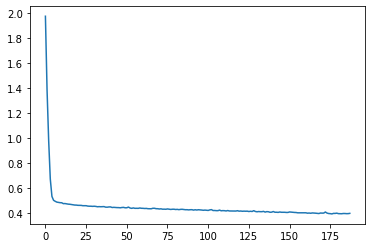

In [80]:
# build MLP classifier
clf_lda = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
model_lda = clf_lda.fit(X_train_lda, y_train_lda)
plt.plot(clf_lda.loss_curve_)

In [81]:
# make prediction
y_pred_lda_mlp = model_lda.predict(X_test_lda)
print(f'Train accuracy:\t {model_lda.score(X_train_lda, y_train_lda)}')
print(f'Test accuracy:\t {model_lda.score(X_test_lda, y_test_lda)}')

print(classification_report(y_test_lda, y_pred_lda_mlp))

Train accuracy:	 0.8461150353178607
Test accuracy:	 0.8164705882352942
                precision    recall  f1-score   support

Entretainement       0.00      0.00      0.00         3
  Entretaining       0.00      0.00      0.00        10
 Entretinement       0.60      0.49      0.54       196
    Navigating       0.70      0.68      0.69       283
          Work       0.72      0.81      0.76       536
    com.comuto       0.00      0.00      0.00         1
   unavailable       0.00      0.00      0.00         3
       unknown       1.00      1.00      1.00       668

      accuracy                           0.82      1700
     macro avg       0.38      0.37      0.37      1700
  weighted avg       0.81      0.82      0.81      1700



c:\Users\Dasil\anaconda3\envs\FD\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dasil\anaconda3\envs\FD\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dasil\anaconda3\envs\FD\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


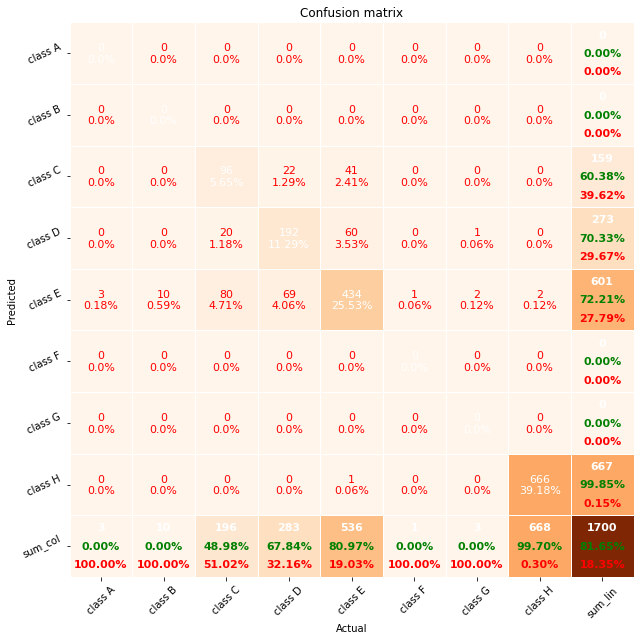

In [82]:
from pretty_confusion_matrix import pp_matrix_from_data
pp_matrix_from_data(y_test_lda, y_pred_lda_mlp)